<a href="https://colab.research.google.com/github/Riddhi21Kohli/TODO/blob/main/riddhiassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

reading the dataset


In [3]:
dataset=pd.read_csv('Fraud.csv')

In [4]:
dataset.shape

(42271, 11)

CHECKING FOR NULL VALUES IN DATASET


If there is any null value at any place it will return true atb place where there is no Null value it will return false.

In [7]:
dataset.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
42266,False,False,False,False,False,False,False,False,False,False,False
42267,False,False,False,False,False,False,False,False,False,False,False
42268,False,False,False,False,False,False,False,False,False,False,False
42269,False,False,False,False,False,False,False,False,False,False,False


In [5]:
dataset.isnull().values.any()

True

It returns true as there are some missing values

In [6]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

The place where it is mentioned 1 shows that this place has 1 missing value.

Here we have deleted the row that contains the NULL value

In [8]:
dataset=dataset.dropna()

In [9]:
dataset.shape

(42270, 11)

IF THERE WERE MANY MISSING VALUES THAN WE CAN REPLACE IT BY MEAN IF THERE ARE NO OUTLIERS .IF THER ARE OUTLIERS THEN WE CAN REPLACE IT BY MEDIAN.IF THERE ARE MISSING VALUES IN CATEGORICAL COLUMN THEN WE WILL REPLACE IT BY MODE.



Checking whether the dataset is balanced or not

Depending whether the dataset is balanced or not we will decide the algorithm to be used

In [14]:
dataset['isFraud'].value_counts()

0.0    42176
1.0       94
Name: isFraud, dtype: int64

In [15]:
lt = list(dataset['isFraud'].value_counts())

here there are 42176 entries which specify they are not fraud and 94 entries that are fraud

In [16]:
lt

[42176, 94]

In [17]:
notfraud_percent = (lt[0] / (lt[0]+lt[1])) * 100
fraud_percent = (lt[1] / (lt[0]+lt[1])) * 100


In [18]:
print("not a fraud :", lt[0])
print("fraud: ", lt[1])
print("percent of transactions not a fraud: {:.4f} %".format(notfraud_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

not a fraud : 42176
fraud:  94
percent of transactions not a fraud: 99.7776 %
Percentage of Fraud transactions: 0.2224 %


THIS COMPLETELY SHOWS THE DATASET IS UNBALANCED

So , we can use random forest,decision tree,logistic regression

In [19]:
dataset.shape

(42270, 11)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42270 entries, 0 to 42269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42270 non-null  int64  
 1   type            42270 non-null  object 
 2   amount          42270 non-null  float64
 3   nameOrig        42270 non-null  object 
 4   oldbalanceOrg   42270 non-null  float64
 5   newbalanceOrig  42270 non-null  float64
 6   nameDest        42270 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.9+ MB


In [22]:
columns_to_check = ['step', 'amount', 'oldbalanceOrg' , 'newbalanceOrig','oldbalanceDest','newbalanceDest']

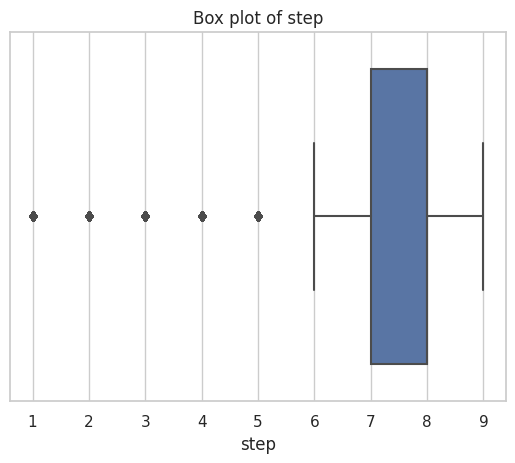

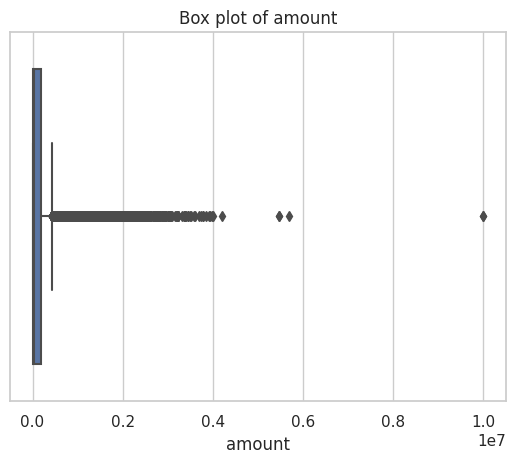

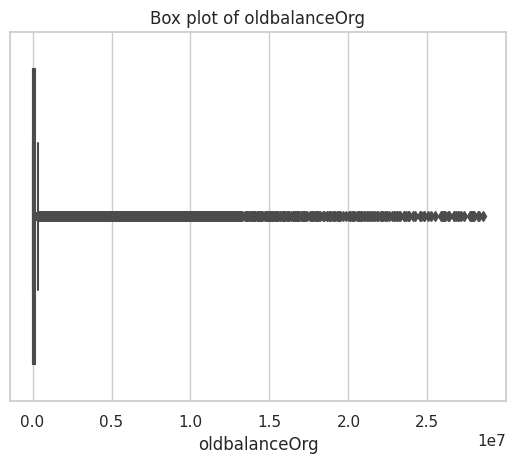

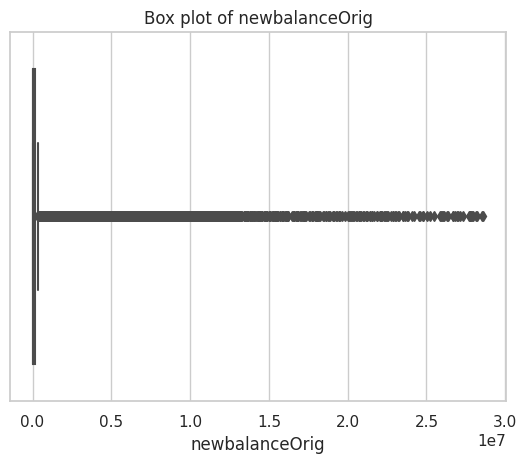

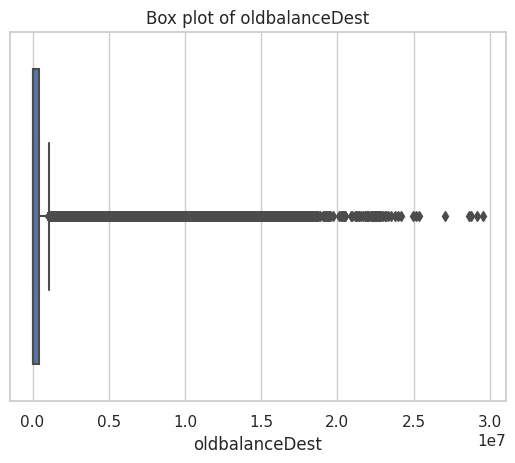

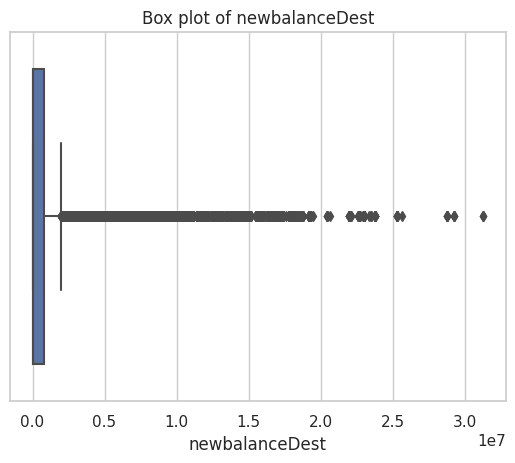

In [76]:
for column in columns_to_check:
    sns.boxplot(x=dataset[column])
    sns.set(style="whitegrid")
    plt.title(f"Box plot of {column}")
    plt.show()

<ipython-input-77-18e3de76b577>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<Axes: >

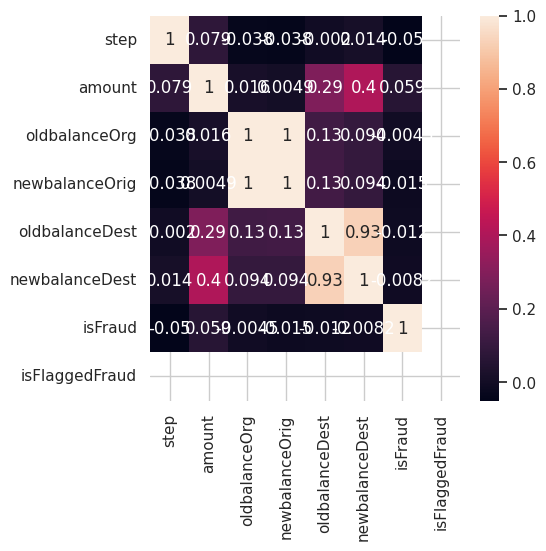

In [77]:
corr=dataset.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)

In [78]:
df=dataset.copy()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


For checking multi-collinearity firstly we need to check the columns with dtype OBJECT

In [79]:
objectcolumns = df.select_dtypes(include = "object").columns
print (objectcolumns)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


After finding the column with dtype OBJECT we will encode them using label encoder.

In [80]:
encoder = LabelEncoder()
for i in objectcolumns:
    df[i] = encoder.fit_transform(df[i].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42270 entries, 0 to 42269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42270 non-null  int64  
 1   type            42270 non-null  int64  
 2   amount          42270 non-null  float64
 3   nameOrig        42270 non-null  int64  
 4   oldbalanceOrg   42270 non-null  float64
 5   newbalanceOrig  42270 non-null  float64
 6   nameDest        42270 non-null  int64  
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.9 MB
None


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(dataset):
    vif = pd.DataFrame()
    vif["variables"] = dataset.columns
    vif["VIF"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]

    return(vif)
calc_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,5.052578
1,type,5.976194
2,amount,1.894232
3,nameOrig,3.444346
4,oldbalanceOrg,384.974211
5,newbalanceOrig,389.349357
6,nameDest,4.228430
7,oldbalanceDest,8.994939
8,newbalanceDest,10.055253
9,isFraud,1.040841


as we can see VIF value of oldbalanceOrg , newbalanceOrig, oldbalanceDest  , newbalanceDest is very high so we need to fix it





In [84]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransactionPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,3.465906
1,amount,1.471611
2,isFraud,1.038341
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.141598
5,Actual_amount_dest,1.315211
6,TransactionPath,3.283871


<Axes: >

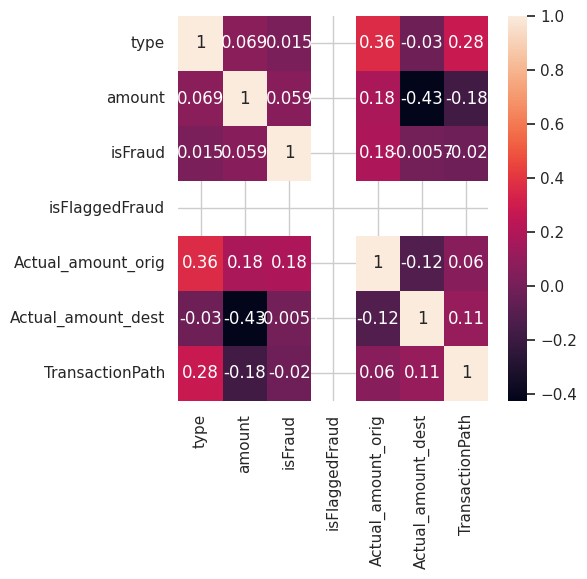

In [56]:
corr=df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True)

Normalix=zing the data

In [85]:
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

Splitting the dataset  into train dataset and test dataset

In [59]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (29589, 6)
Shape of X_test:  (12681, 6)


In [66]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

Y_pred_dt = tree.predict(X_test)
score = tree.score(X_test, Y_test) * 100

In [67]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)
lrscore = lr.score(X_test, Y_test) * 100

In [68]:
forest = RandomForestClassifier(n_estimators= 100)
forest.fit(X_train, Y_train)

Y_pred_rf = forest.predict(X_test)
fscore =forest.score(X_test, Y_test) * 100

In [70]:
print(" Score in case of Decision Tree: ", score)
print(" Score in case of Logistic Regression: ", lrscore)
print(" Score in case of Random Forest: ", fscore)

 Score in case of Decision Tree:  99.76342559735036
 Score in case of Logistic Regression:  99.62936676918224
 Score in case of Random Forest:  99.74765397050706


As we can see the decision taken by Decision tree has highest value so we eill use it .

In [71]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report for Decision Tree:")
print(classification_report_dt)
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report for Random Forest:")
print(classification_report_rf)
classification_report_lr = classification_report(Y_test, Y_pred_lr)
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12644
         1.0       0.71      0.32      0.44        37

    accuracy                           1.00     12681
   macro avg       0.85      0.66      0.72     12681
weighted avg       1.00      1.00      1.00     12681

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12644
         1.0       1.00      0.14      0.24        37

    accuracy                           1.00     12681
   macro avg       1.00      0.57      0.62     12681
weighted avg       1.00      1.00      1.00     12681

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12644
         1.0       0.00      0.00      0.00        37

    accuracy                           1.00     12681

Ans 1,2,4 are done above


Answer 2: Here  in this model we can use decision tree or random forest as both of they gave us high accuracy results.we have used these algorithms as the dataset was imbalanced which contains approximately 99% not fraud and approximately 1% fraud

Ans3: With the help of Correlation Heatmap, I have selected the variables for the model.

Ans 5:Anomalous behaviour If there is some unusual trends in transactions .
Fraudlent action of the person can be known by his transactions analyzing whether the transaction were fraud or not fraud .
Consider relationships between customers and their connections. Fraudsters may operate in networks, so analyzing transactional links between customers can reveal hidden patterns or clusters of fraudulent activity.
Use of stolen or fake identities, as indicated by verification processes or identity verification services.

Ans 6: Yes, these factors make sense
Incorporating external data sources, such as fraud blacklists or shared industry information, provides additional insights and helps identify potential fraudsters based on collective knowledge and experiences.
fraudsters often use different devices or IP addresses to hide their identity or carry out fraudulent activities. Detecting suspicious devices or shared IP addresses can help identify potential fraudulent customers.

What kind of prevention should be adopted while company update its infrastructure?

ans7:Provide comprehensive training to employees about the importance of security,  and identifying and reporting potential fraud incidents. Regularly reinforce security awareness through awareness programs and ongoing education. It should be done so that people even fall to this kind of plan they can share with others .so that the other doesn't become victim of same .
Deploy robust monitoring systems to detect any unusual or suspicious activities in real-time. Intrusion detection systems (IDS) and security information and event management (SIEM) solutions can aid in identifying potential fraud attempts.

Ans 8: gather relevant data on security incidents, attempted frauds, and system logs. Study about them  and find whether the number of frauds are decreased or not.
Engage external auditors  to conduct independent assessments of the implemented prevention measures. These experts can review the infrastructure, policies, and controls in place to identify any potential weaknesses or areas for improvement